In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

In [8]:
from src.cslib import fetch_data

data_dir = 'data/cs-train'
df = fetch_data(data_dir)

['invoices-2018-01.json', 'invoices-2017-12.json', 'invoices-2019-01.json', 'invoices-2018-11.json', 'invoices-2018-07.json', 'invoices-2019-06.json', 'invoices-2019-07.json', 'ts-data', 'invoices-2018-06.json', 'invoices-2018-10.json', 'invoices-2018-09.json', 'invoices-2019-04.json', 'invoices-2018-05.json', 'invoices-2018-12.json', 'invoices-2018-04.json', 'invoices-2019-05.json', 'invoices-2018-08.json', 'invoices-2019-02.json', 'invoices-2018-03.json', 'invoices-2017-11.json', 'invoices-2018-02.json', 'invoices-2019-03.json']


In [9]:
df.head()

,country,customer_id,day,invoice,month,price,stream_id,times_viewed,year,invoice_date
0,United Kingdom,17998.0,28,489562,11,5.95,84656,1,2017,2017-11-28
1,United Kingdom,13085.0,28,489434,11,6.75,79323W,12,2017,2017-11-28
2,United Kingdom,13085.0,28,489434,11,2.10,22041,21,2017,2017-11-28
3,United Kingdom,13085.0,28,489434,11,1.25,21232,5,2017,2017-11-28
4,United Kingdom,13085.0,28,489434,11,1.65,22064,17,2017,2017-11-28


In [10]:
df[['price', 'times_viewed']].describe()

,price,times_viewed
count,815011.000000,815011.000000
mean,4.802631,5.231106
std,135.058707,5.109982
min,-53594.360000,0.000000
25%,1.250000,1.000000
50%,2.100000,3.000000
75%,4.210000,8.000000
max,38970.000000,24.000000


## Survey of sales in each country

In [5]:
df.groupby('country').sum()[['price']].sort_values('price', ascending=False)

,price
country,
United Kingdom,3.521514e+06
EIRE,1.070692e+05
Germany,4.927182e+04
France,4.056514e+04
Norway,3.849475e+04
Spain,1.604099e+04
Hong Kong,1.445257e+04
Portugal,1.352867e+04
Singapore,1.317592e+04


In [6]:
df_ym = df.groupby(['country','year','month'], as_index=False)['price'].sum()

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

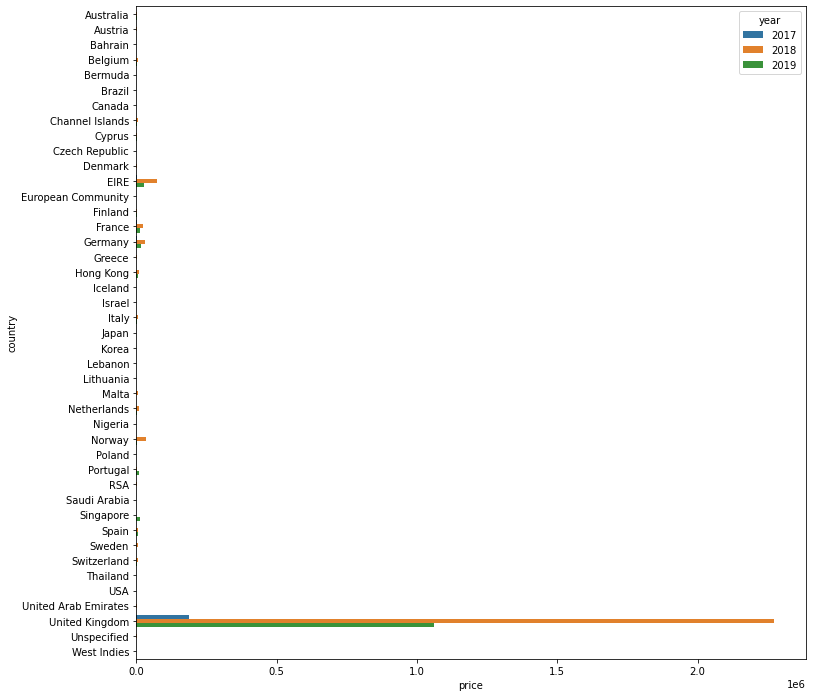

In [7]:
plt.figure(figsize=(12,12))
sns.barplot(data=df_ym.groupby(['country', 'year'], as_index=False).sum(), x='price', y='country', hue='year')
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

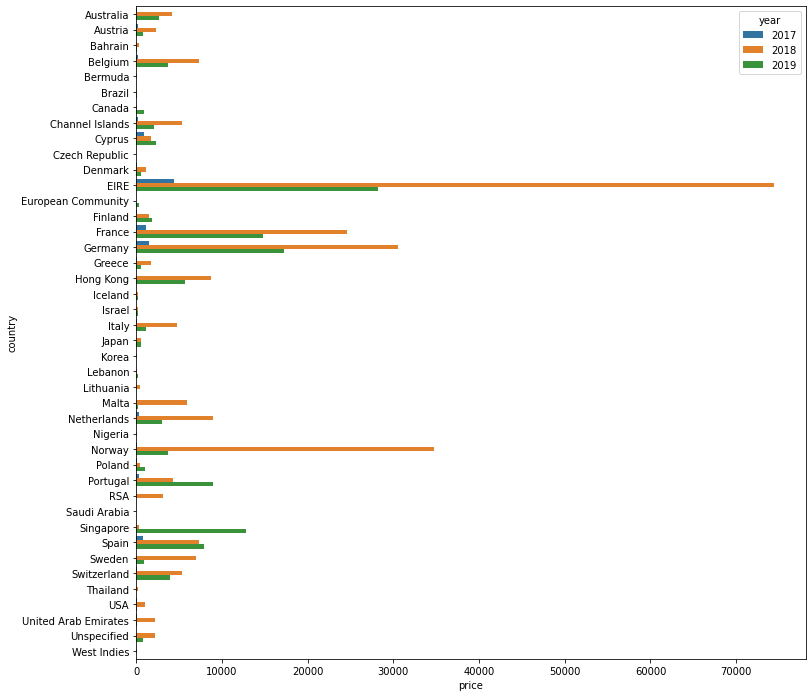

In [8]:
plt.figure(figsize=(12,12))
sns.barplot(data=df_ym[df_ym.country!='United Kingdom'].groupby(['country', 'year'], as_index=False).sum(), x='price', y='country', hue='year')
plt.plot

In [9]:
top10_countries = df.groupby('country').sum()[['price']].sort_values('price', ascending=False).index[:10].tolist()

In [10]:
top10_countries

['United Kingdom',
 'EIRE',
 'Germany',
 'France',
 'Norway',
 'Spain',
 'Hong Kong',
 'Portugal',
 'Singapore',
 'Netherlands']

## survey Time series trends

In [11]:
df_all = df.groupby(['invoice_date'], as_index=False).sum()

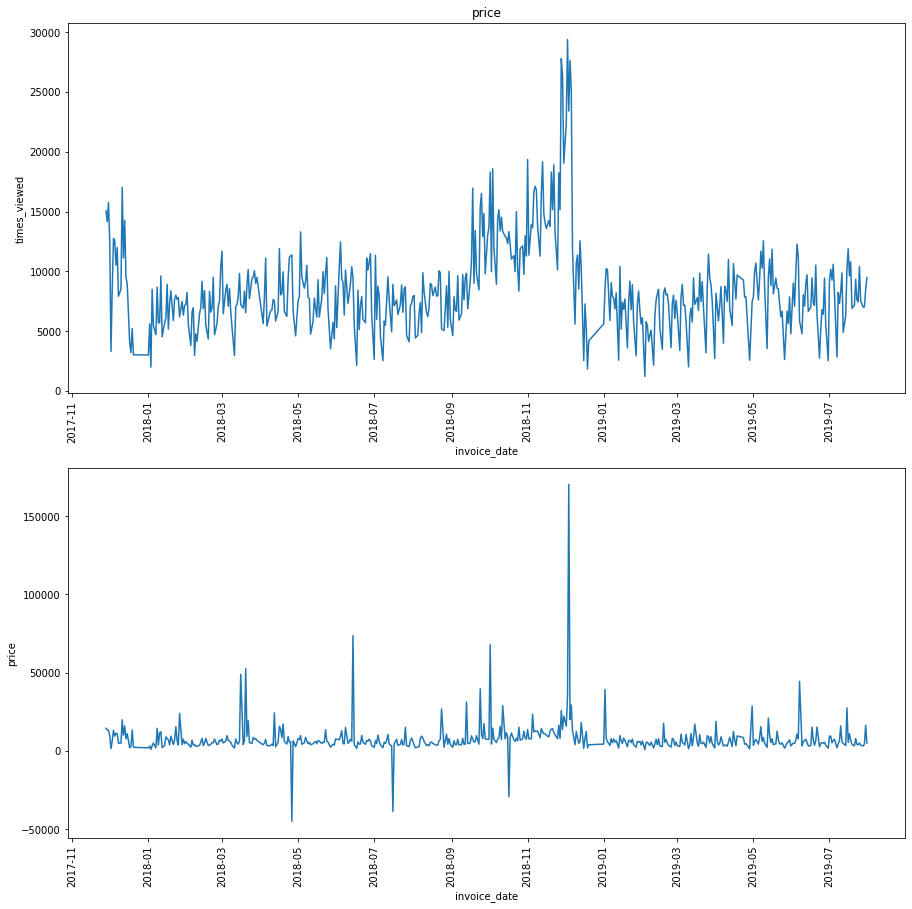

In [25]:
# sum revenue, times_viewed plot
plt.figure(figsize=(15,15))

plt.title('times_viewed')
plt.subplot(2,1,1)
sns.lineplot(data=df_all, x='invoice_date', y='times_viewed')
plt.xticks(rotation=90)

plt.title('price')
plt.subplot(2,1,2)
sns.lineplot(data=df_all, x='invoice_date', y='price')
plt.xticks(rotation=90)

plt.show()

<AxesSubplot:xlabel='times_viewed', ylabel='price'>

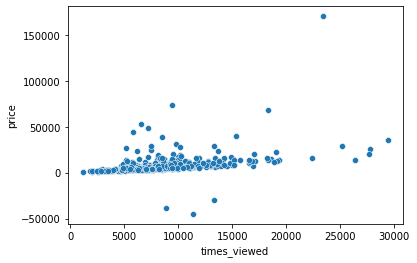

In [27]:
# times_viewed vs price
sns.scatterplot(data=df_all, x='times_viewed', y='price')

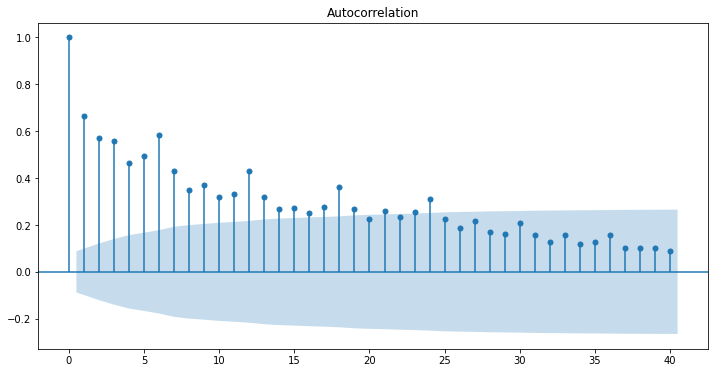

In [42]:
# autp correlation
import statsmodels.api as sm
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
fig = sm.graphics.tsa.plot_acf(df_all.times_viewed, lags=40, ax=ax)

In [54]:
df_all['rolling_30']=df_all['times_viewed'].rolling(window=30).mean()

[]

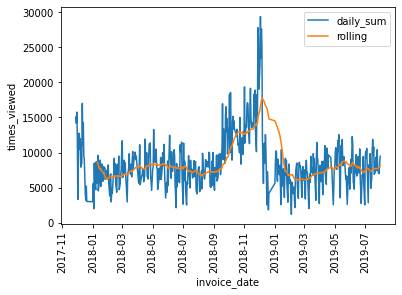

In [66]:
# yearly trends
sns.lineplot(data=df_all, x='invoice_date', y='times_viewed', label='daily_sum')
sns.lineplot(data=df_all, x='invoice_date', y='rolling_30', label='rolling')
plt.xticks(rotation=90)
plt.legend()
plt.plot()